In [1]:
import os
import cv2 as cv
import numpy as np
from matplotlib import cm, pyplot as plt
from IPython.display import display, Markdown

from imageutils import mutual_information, mean_square_diff, \
                       translate, yield_translations
from registration import image_registration_mi, image_registration_msd

# For reproducible results
np.random.seed(0)

In [2]:
def load_images(prefix):
    filenames = ["I{}_{}.png".format(prefix, n) for n in (1, 2)]
    for fn in filenames:
        assert os.path.isfile(fn), fn + " is not a file"
    return [cv.imread(fn, cv.IMREAD_GRAYSCALE) for fn in filenames]

# Load brain images
I1_1, I1_2 = load_images(1)
I2_1, I2_2 = load_images(2)

In [3]:
# Plot images
def plot_image_pairs(imgs, scale=6):    
    cols = 2
    rows = (len(imgs) + 1) // 2
    width = cols * scale
    height = rows * scale
    _ = plt.figure(figsize=(width, height))
    for i, img in enumerate(imgs, 1):
        _ = plt.subplot(rows, cols, i)
        _ = plt.imshow(img, cmap=cm.gray)
    _ = plt.show()

# Images I1_1 and I1_2

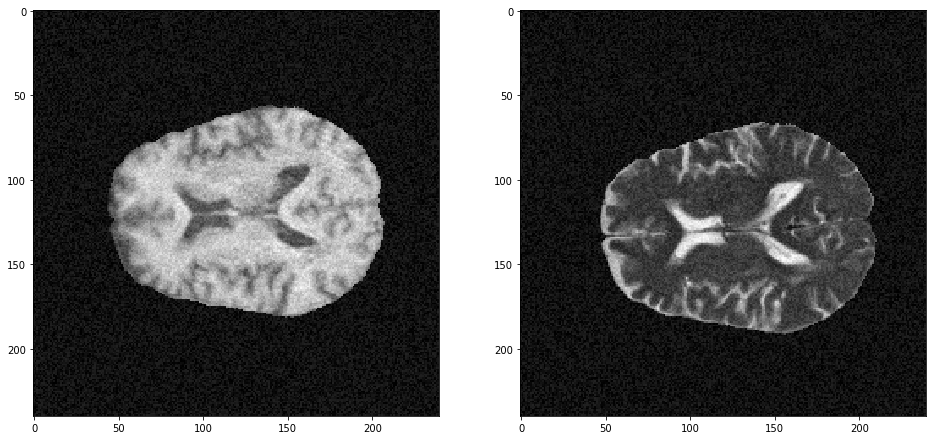

In [4]:
print("I1_1 and I1_2")
# plot_image_pairs([I1_1, I1_2], 8)

## Mutual Information

In [5]:
print("Registering by maximizing mutual information")
I1_mi = image_registration_mi(I1_1, I1_2, 2000)

Brute force method
(0, 0) 0.9653021245065769
(0, 1) 0.9859577057406792
(1, 1) 0.9870954202470053
(0, 2) 1.0036592857156101
(1, 2) 1.0119328646581476
(0, 3) 1.0286166417685632
(1, 3) 1.0344004237610065
(2, 3) 1.035669798148927
(0, 4) 1.0475383657096344
(1, 4) 1.0564842121495026
(2, 4) 1.0591237880168745
(0, 5) 1.0791384989877244
(1, 5) 1.0832082554295166
(2, 5) 1.0880196971676135
(3, 5) 1.0904882422294246
(0, 6) 1.0960665452983065
(1, 6) 1.1091033225256908
(2, 6) 1.1151641166938848
(3, 6) 1.1194859532948502
(0, 7) 1.1225264703183946
(1, 7) 1.136506448623992
(2, 7) 1.1510483632120412
(3, 7) 1.1568310016776433
(1, 8) 1.1710989745605271
(2, 8) 1.189769011625911
(3, 8) 1.1980670663544473
(1, 9) 1.1990411046795728
(2, 9) 1.2259284552557546
(3, 9) 1.2371538600667655
(2, 10) 1.244349347327793
(3, 10) 1.2698222716440846
No improvement in last 200 iterations...
No improvement in last 400 iterations...
No improvement in last 600 iterations...
No improvement in last 800 iterations...
No improvemen

## Mean Square Difference

In [6]:
print("Registering by minimizing mean square difference")
I1_msd = image_registration_msd(I1_1, I1_2)

Brute force method
(0, 0) -85.95927083333333
(-1, 0) -85.75644097222222
(0, -1) -85.37026041666667
(2, 4) -85.29579861111111
(3, 4) -85.16552083333333
(2, 5) -84.85055555555556
(4, 6) -84.81381944444445
(2, 7) -84.46463541666667
(2, 8) -84.22800347222223
No improvement in last 23040 iterations...
No improvement in last 46080 iterations...
No improvement in last 69120 iterations...
No improvement in last 92160 iterations...
No improvement in last 115200 iterations...
No improvement in last 138240 iterations...
No improvement in last 161280 iterations...
No improvement in last 184320 iterations...
No improvement in last 207360 iterations...
Best translation (2, 8) has MSD = 84.2280


# Images I2_1 and I2_2

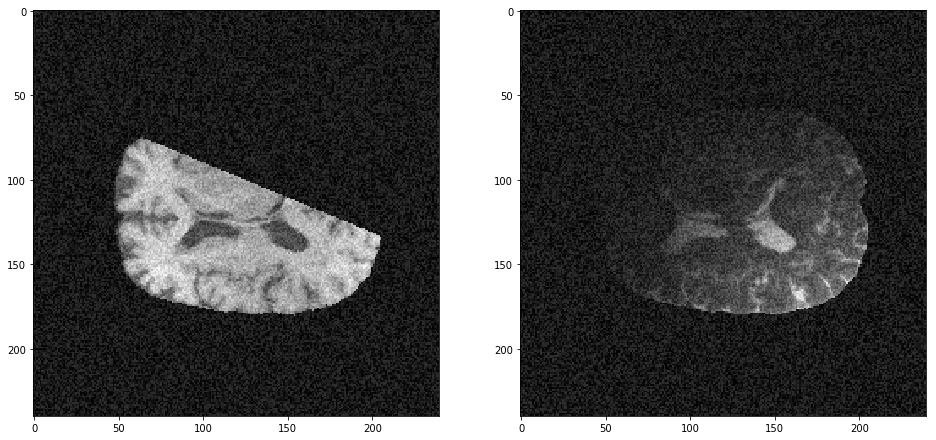

In [7]:
print("I2_1 and I2_2")
# plot_image_pairs([I2_1, I2_2], 8)

## Mutual Information

In [8]:
print("Registering by maximizing mutual information")
I2_mi = image_registration_mi(I2_1, I2_2, 2000)

Brute force method
(0, 0) 0.5973944049257991
(1, -1) 0.5975209008355282
(2, -1) 0.5982609129969898
(8, 1) 0.598430130099521
(10, 1) 0.5984614930089052
No improvement in last 200 iterations...
(14, 0) 0.5995072363824203
(15, -4) 0.5995572991301792
(17, -1) 0.6024260030305353
No improvement in last 200 iterations...
No improvement in last 400 iterations...
No improvement in last 600 iterations...
(22, -1) 0.6037022882718901
(23, -1) 0.6046065781902428
No improvement in last 200 iterations...
(25, -1) 0.6051470341886258
(26, 0) 0.6057992138920198
(26, 2) 0.6061457479783829
No improvement in last 200 iterations...
No improvement in last 400 iterations...
(29, 0) 0.6073413347207115
(29, 1) 0.6084268158589143
(29, -2) 0.6084579635461935
No improvement in last 200 iterations...
(31, 1) 0.6098016028316522
No improvement in last 200 iterations...
No improvement in last 400 iterations...
No improvement in last 600 iterations...
No improvement in last 800 iterations...
No improvement in last 1000

## Mean Square Difference

In [9]:
print("Registering by minimizing mean square difference")
I2_msd = image_registration_msd(I2_1, I2_2)

Brute force method
(0, 0) -92.89083333333333
(7, 3) -92.82001736111111
(8, 3) -92.76868055555556
No improvement in last 23040 iterations...
No improvement in last 46080 iterations...
No improvement in last 69120 iterations...
No improvement in last 92160 iterations...
No improvement in last 115200 iterations...
No improvement in last 138240 iterations...
No improvement in last 161280 iterations...
No improvement in last 184320 iterations...
No improvement in last 207360 iterations...
Best translation (8, 3) has MSD = 92.7687


# Results

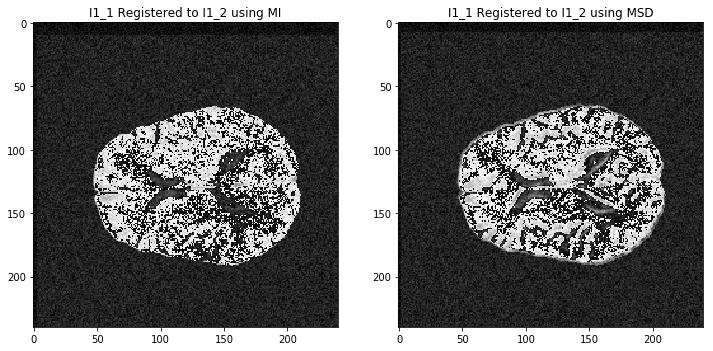

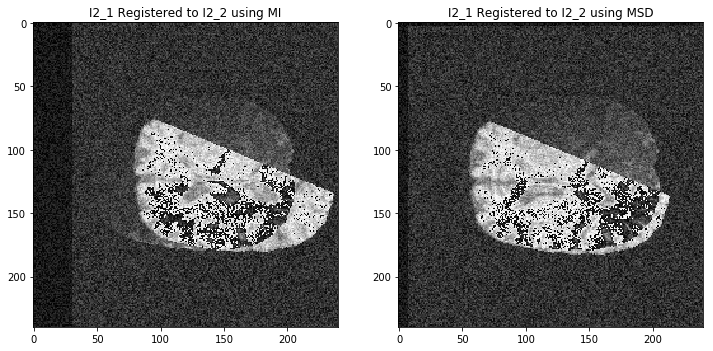

In [13]:
def overlay(img1, img2):
    return (img1 + img2) / 2

# Compare performance of MI and MSD based transformations by
# overlaying the moved image and the fixed image
_ = plt.figure(figsize=(12,6))
_ = plt.subplot(121)
_ = plt.imshow(overlay(I1_mi, I1_2), cmap=cm.gray)
_ = plt.title("I1_1 Registered to I1_2 using MI")
_ = plt.subplot(122)
_ = plt.imshow(overlay(I1_msd, I1_2), cmap=cm.gray)
_ = plt.title("I1_1 Registered to I1_2 using MSD")
_ = plt.show()

_ = plt.figure(figsize=(12,6))
_ = plt.subplot(121)
_ = plt.imshow(overlay(I2_mi, I2_2), cmap=cm.gray)
_ = plt.title("I2_1 Registered to I2_2 using MI")
_ = plt.subplot(122)
_ = plt.imshow(overlay(I2_msd, I2_2), cmap=cm.gray)
_ = plt.title("I2_1 Registered to I2_2 using MSD")              
_ = plt.show()

# Discussion

For the first pair of images (I1_1, I1_2), registration by maximizing mutual information produces a slightly better alignment than registration by minimizing mean square difference.  In contrast, for the second pair of images (I2_1, I2_2), registration by maximizing mutual information produces a significantly worse alignment than registration by minimizing mean square difference.

## Explanation: consistency of pixel values versus consistent mapping of pixel values
The inferior performance of the MSD-based registration method for the first image pair results from the fact that MSD is not robust to variations in pixel intensities of the same features between images.  In other words, because some regions of the brain in the first moving image are lighter or darker than those same regions of the brain in the first fixed image, the MSD of the two images will remain high even when those features are aligned.

On the other hand, the MI metric does not require proximity in pixel _values_ of features between images as long as there is a relatively consistent _mapping_ of pixel values of features from the moving image to pixel intensities of those same features in the fixed image.  In other words, knowing the approximate pixel intensity of a brain feature in the moving image provides a relatively reliable prediction of the pixel values to be expected for that brain feature in the fixed image.  This is the type of registration task where mutual information is the right metric.

## Limitations of mutual information
In the second image pair, however, the mapping of pixel intensities of brain features from the moving image to the fixed image is much less consistent.  Mutual information is maximized when the joint entropy of pixel intensities of features across images is low; when pixel intensities of features in one image do not provide reliable information about the pixel intensities of features in the other image, the joint entropy will be high even when those features come into alignment.

## Summary
Mean square difference is a good metric for registration when there are consistent __values__ of pixel intensities between the same features in the two images. Mutual information is a good metric for registration when there is a consistent __mapping__ of pixel intensities between the same features in the two images, .
